In [1]:
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

from functools import reduce

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import average
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.stats.mstats import gmean

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

import sklearn
import sklearn.preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.datasets import samples_generator
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import MDS
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut

In [3]:
bases = ['A','C','G','T']

In [4]:
f = open("hgdp/HGDP_FinalReport_Forward.txt")
of = open("hgdp/hgdp_num.txt","w")

head = f.readline()
for l in f:
    l = l.split("\t",1)
    c = []
    for b in bases:
        c.append(l[1].count(b))
    cs = np.argsort(c)[::-1]
    
    if c[cs[1]] > 0 and c[cs[2]] == 0:
        b1 = bases[cs[0]]
        b2 = bases[cs[1]]
        nd = l[1].replace(b1+b1,"0").replace(b1+b2,"1").replace(b2+b1,"1").replace(b2+b2,"2").replace("--","-1")
        of.write("%s\t%s" % (l[0],nd))
        
f.close()
of.close()
    


In [5]:
hc = ["SNP"] + head.split("\t")[1:]

hgdp = pd.read_csv("hgdp/hgdp_num.txt", sep = "\t", names = hc)

In [6]:
hgdp_datacols = hgdp.columns[1:]

In [17]:
locdf = pd.read_csv("hgdp/hgdp_pop.txt",sep="\t")
locdf = locdf.set_index("ID")

In [31]:
hgdp_loccols = []
hgdp_loc = []
for c in hgdp_datacols:
    if c in locdf.index:
        hgdp_loccols.append(c)
        r = locdf.loc[c]
        hgdp_loc.append(r['Region'])

In [41]:
lc = {'AFRICA' : 'red', 'AMERICA' : 'green', 'CENTRAL_SOUTH_ASIA' : 'blue', 'EAST_ASIA' : 'purple', 'EUROPE' : 'black',
       'MIDDLE_EAST' : 'orange', 'OCEANIA' : 'brown'}

li = {'AFRICA' : 0, 'AMERICA' : 1, 'CENTRAL_SOUTH_ASIA' : 2, 'EAST_ASIA' : 3, 'EUROPE' : 4,
       'MIDDLE_EAST' : 5, 'OCEANIA' : 6}


plotc = []
y = []

for r in hgdp_loc:
    plotc.append(lc[r])
    y.append(li[r])
    
    

In [36]:
X = hgdp[hgdp_loccols].values

In [37]:
XX = X.T

In [38]:
X_embedded = TSNE(n_components=2).fit_transform(XX)

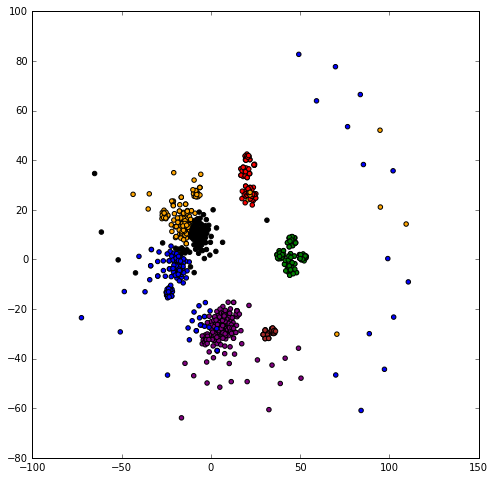

In [40]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_embedded[:,0],X_embedded[:,1], c=plotc)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(XX,y)

clf = GaussianNB()
clf.fit(X_train,y_train)
trp = clf.predict(X_test)
print ("Score: ", clf.score(X_test,y_test))

Score:  0.666666666667


In [45]:
trp

array([3, 5, 2, 2, 2, 0, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 4, 2, 5, 2, 2, 5, 3,
       2, 2, 5, 5, 2, 5, 5, 3, 2, 5, 2, 1, 4, 5, 2, 0, 2, 0, 0, 2, 4, 2, 2,
       1, 3, 5, 2, 5, 5, 5, 2, 0, 2, 2, 2, 2, 0, 5, 0, 0, 2, 5, 3, 2, 5, 0,
       3, 5, 5, 4, 4, 3, 4, 0, 0, 5, 2, 5, 4, 5, 3, 1, 2, 2, 2, 2, 5, 2, 2,
       4, 4, 2, 2, 2, 4, 2, 3, 3, 5, 2, 2, 0, 2, 1, 5, 3, 5, 2, 2, 3, 2, 2,
       5, 3, 5, 5, 5, 2, 4, 2, 2, 2, 5, 1, 2, 5, 5, 2, 0, 2, 1, 5, 2, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 5, 3, 5, 2, 2, 2, 5, 4, 2, 4, 3, 5, 2,
       5, 0, 4, 1, 0, 2, 0, 5, 3, 2, 2, 2, 2, 5, 5, 5, 2, 2, 5, 5, 1, 3, 0,
       2, 2, 5, 4, 3, 5, 5, 1, 5, 2, 2, 3, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 5, 2, 5, 2, 2, 2, 5, 5, 5, 5, 2, 0, 5, 5, 5, 5, 5, 5, 2,
       2, 0, 5, 0, 1, 2, 2, 2, 2, 2, 0, 5, 5, 2, 2, 5, 5, 2, 5])

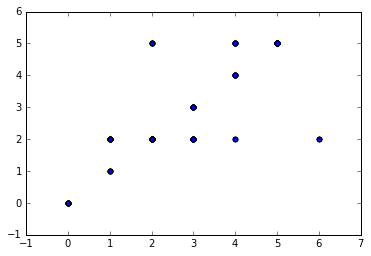

In [48]:
plt.scatter(y_test,trp)

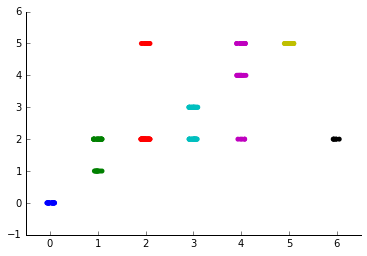

In [51]:
sns.stripplot(x=y_test, y=trp, jitter=True)
sns.despine()